<a href="https://colab.research.google.com/github/Yuvalakshmii/EDA-projects/blob/main/FINAL_eda_rev_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Preprocessing

In [ ]:
import pandas as pd
import numpy as np
!pip install pandas matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
!pip install plotly
!pip install minepy
!pip install skrebate
!pip install scikit-learn

In [ ]:
df = pd.read_csv('/content/corona_indonesia.csv')
df.head(10)


,ISO,Location,Population,Total Cases,Total Deaths,Island,TC1Mpop,TD1Mpop
0,ID-JK,DKI Jakarta,10846145,39,20,Jawa,3.60,1.84
1,ID-JK,DKI Jakarta,10846145,41,20,Jawa,3.78,1.84
2,IDN,Indonesia,265185520,2,0,NaN,0.01,0.00
3,ID-RI,Riau,6074100,1,0,Sumatera,0.16,0.00
4,ID-JK,DKI Jakarta,10846145,43,20,Jawa,3.96,1.84
5,IDN,Indonesia,265185520,2,0,NaN,0.01,0.00
6,ID-JB,Jawa Barat,45161325,1,1,Jawa,0.02,0.02
7,ID-RI,Riau,6074100,1,0,Sumatera,0.16,0.00
8,ID-JK,DKI Jakarta,10846145,45,20,Jawa,4.15,1.84
9,IDN,Indonesia,265185520,2,0,NaN,0.01,0.00


In [ ]:
df.rename(columns={0: 'ISO',
                     1: 'Location',
                     2: 'Population',
                     3: 'Total Cases',
                     4: 'Total Deaths',
                     5: 'Island',
                     6: 'TC1Mpop',
                     7: 'TD1Mpop'},inplace=True)


In [ ]:
df.drop(index=0,inplace=True)

In [ ]:
df['Total Cases']=df['Total Cases'].fillna(0).astype(int)
df['Total Deaths']=df['Total Deaths'].fillna(0).astype(int)
df['TC1Mpop']=df['TC1Mpop'].fillna(0).astype(float)
df['TD1Mpop']=df['TD1Mpop'].fillna(0).astype(float)

#This data transformation was necessary due to incorrect variable names in the dataset.

Data Information

In [ ]:
df

,ISO,Location,Population,Total Cases,Total Deaths,Island,TC1Mpop,TD1Mpop
1,ID-JK,DKI Jakarta,10846145,41,20,Jawa,3.78,1.84
2,IDN,Indonesia,265185520,2,0,NaN,0.01,0.00
3,ID-RI,Riau,6074100,1,0,Sumatera,0.16,0.00
4,ID-JK,DKI Jakarta,10846145,43,20,Jawa,3.96,1.84
5,IDN,Indonesia,265185520,2,0,NaN,0.01,0.00
...,...,...,...,...,...,...,...,...
31817,ID-SA,Sulawesi Utara,2641884,52770,1213,Sulawesi,19974.38,459.14
31818,ID-SB,Sumatera Barat,5519245,104640,2371,Sumatera,18959.11,429.59
31819,ID-SS,Sumatera Selatan,8217551,82198,3376,Sumatera,10002.74,410.83
31820,ID-SU,Sumatera Utara,14874889,158866,3288,Sumatera,10680.15,221.04


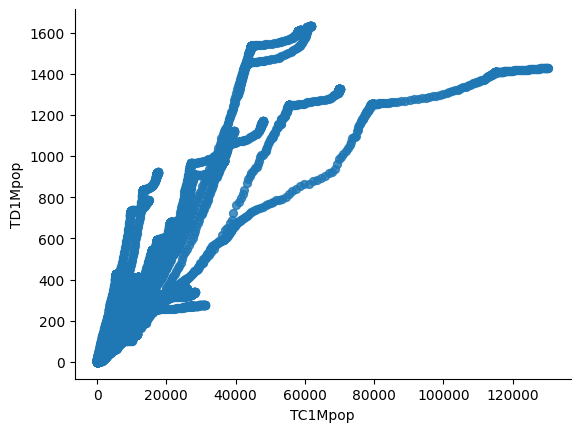

In [ ]:
# Total Cases 1million pop vs Total Deaths 1 million pop

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='TC1Mpop', y='TD1Mpop', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

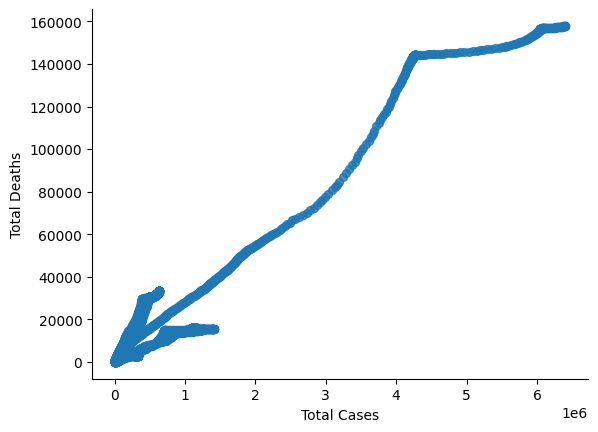

In [ ]:
# Total Cases vs Total Deaths

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Total Cases', y='Total Deaths', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

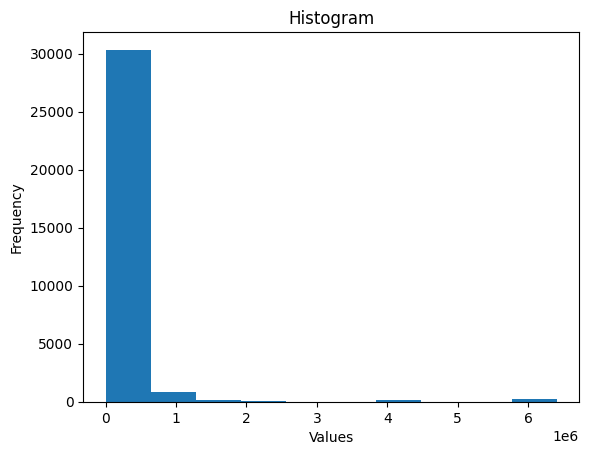

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the histogram
fig, ax = plt.subplots()
ax.hist(df['Total Cases'], bins=10)

# Customize the histogram
ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Histogram')

# Show the histogram
plt.show()


Inference for pareto :
The most frequent category (the first bar on the left) has the most cases.
The number of cases in each category appears to be decreasing from left to right.
The red line appears to be asymptotic to the 100% line, which means that the cumulative percentage of cases is eventually going to approach 100%.

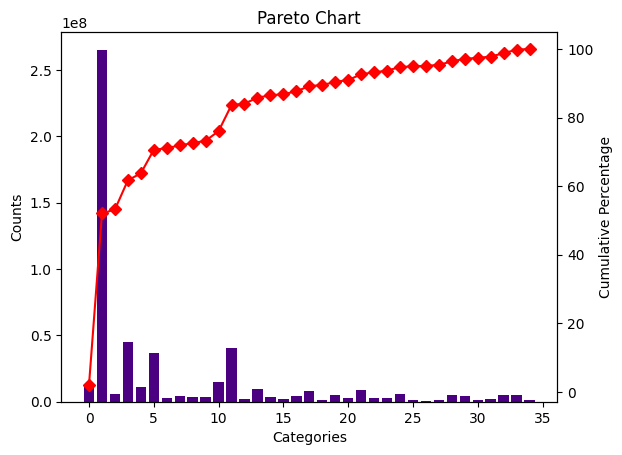

In [ ]:
#Pareto chart
import pandas as pd
import matplotlib.pyplot as plt

# Specify the column names
columns = {
    0: 'ISO',
    1: 'Location',
    2: 'Population',
    3: 'Total Cases',
    4: 'Total Deaths',
    5: 'Island',
    6: 'TC1Mpop',
    7: 'TD1Mpop'
}

# Read the data using the specified columns
df = pd.read_csv('/content/corona_indonesia.csv', header=None)
df = df.rename(columns=columns)

# Filter out non-numeric values in the 'Population' column
df['Population'] = pd.to_numeric(df['Population'], errors='coerce')
df = df.dropna(subset=['Population'])

# Calculate the counts and cumulative percentage
counts = df['Population'].value_counts().index.tolist()[:218]
cumulative_counts = [sum(counts[:i+1]) for i in range(len(counts))]
cumulative_percentage = [count / sum(counts) * 100 for count in cumulative_counts]

# Create the Pareto chart
fig, ax = plt.subplots()
ax.bar(range(len(counts)), counts, color='indigo')
ax2 = ax.twinx()
ax2.plot(range(len(counts)), cumulative_percentage, color='red', marker='D')

# Customize the Pareto chart
ax.set_xlabel('Categories')
ax.set_ylabel('Counts')
ax2.set_ylabel('Cumulative Percentage')
ax.set_title('Pareto Chart')

# Show the Pareto chart
plt.show()


In [ ]:
#z-score
import pandas as pd

def calculate_z_scores(data_file):



  # Select only numeric columns (excluding 'Death percentage')
  numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

  # Create a copy to avoid modifying original data
  data_with_zscores = df.copy()

  # Calculate z-scores for each numeric column
  for col in numeric_cols:
    mean = data_with_zscores[col].mean()
    std = data_with_zscores[col].std()
    data_with_zscores['z-score_' + col] = (data_with_zscores[col] - mean) / std

  return data_with_zscores

# Replace 'your_data.csv' with the actual path to your CSV file
data_with_zscores = calculate_z_scores('/corona_indonesia.csv')

# Print the DataFrame with added z-score columns
print(data_with_zscores)


         ISO          Location   Population Total Cases Total Deaths  \
1      ID-JK       DKI Jakarta   10846145.0          39           20   
2      ID-JK       DKI Jakarta   10846145.0          41           20   
3        IDN         Indonesia  265185520.0           2            0   
4      ID-RI              Riau    6074100.0           1            0   
5      ID-JK       DKI Jakarta   10846145.0          43           20   
...      ...               ...          ...         ...          ...   
31818  ID-SA    Sulawesi Utara    2641884.0       52770         1213   
31819  ID-SB    Sumatera Barat    5519245.0      104640         2371   
31820  ID-SS  Sumatera Selatan    8217551.0       82198         3376   
31821  ID-SU    Sumatera Utara   14874889.0      158866         3288   
31822    IDN         Indonesia  265185520.0     6405044       157876   

         Island   TC1Mpop TD1Mpop  z-score_Population  
1          Jawa       3.6    1.84           -0.101340  
2          Jawa      3.

**Execution of Data Analysis**

---



In [ ]:
df.describe()

,Population
count,3.182200e+04
mean,1.536766e+07
std,4.461714e+07
min,6.484070e+05
25%,1.999539e+06
50%,4.216171e+06
75%,9.095591e+06
max,2.651855e+08


**Missing Data**

---



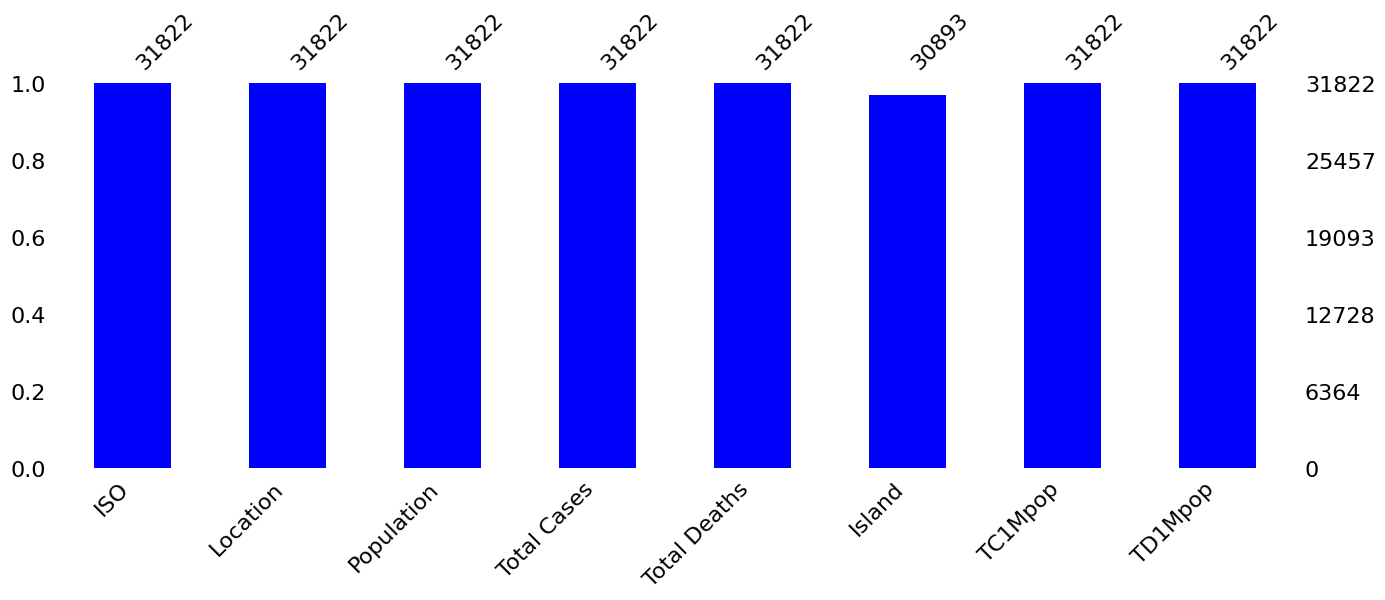

In [ ]:
msno.bar(df, figsize = (16,5),color = "blue")
plt.show()

In [ ]:
df.isnull().sum()

ISO               0
Location          0
Population        0
Total Cases       0
Total Deaths      0
Island          929
TC1Mpop           0
TD1Mpop           0
dtype: int64

There are no missing values in the dataset, which means that there will be no distortion of information during the correlation analysis.

In [ ]:
# filling missing value using fillna()
df.fillna(0)
# filling a missing value with previous ones
df.fillna(method ='pad')


,ISO,Location,Population,Total Cases,Total Deaths,Island,TC1Mpop,TD1Mpop
1,ID-JK,DKI Jakarta,10846145.0,39,20,Jawa,3.6,1.84
2,ID-JK,DKI Jakarta,10846145.0,41,20,Jawa,3.78,1.84
3,IDN,Indonesia,265185520.0,2,0,Jawa,0.01,0
4,ID-RI,Riau,6074100.0,1,0,Sumatera,0.16,0
5,ID-JK,DKI Jakarta,10846145.0,43,20,Jawa,3.96,1.84
...,...,...,...,...,...,...,...,...
31818,ID-SA,Sulawesi Utara,2641884.0,52770,1213,Sulawesi,19974.38,459.14
31819,ID-SB,Sumatera Barat,5519245.0,104640,2371,Sumatera,18959.11,429.59
31820,ID-SS,Sumatera Selatan,8217551.0,82198,3376,Sumatera,10002.74,410.83
31821,ID-SU,Sumatera Utara,14874889.0,158866,3288,Sumatera,10680.15,221.04


In [ ]:
#KNN\
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [ ]:
# Assuming 'Total Cases' is the target variable with discrete class labels
y = df['Total Cases']  # Assuming 'Total Cases' contains categorical labels

# Split the dataset into features (X) and target variable (y)
X = df[['Total Deaths', 'TD1Mpop']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.029850746268656716


In [ ]:
!pip install fancyimpute



In [ ]:
#MICE-Multivariate Imputation by Chained Equations
import pandas as pd
from fancyimpute import IterativeImputer

# Split the dataset into features (X) and target variable (y)
X = df[['Total Deaths','TD1Mpop']]
y = df[['Total Cases','TC1Mpop']]

# Create an instance of the MICE imputer
mice_imputer = IterativeImputer()

# Perform the MICE imputation on the dataset
X_imputed = mice_imputer.fit_transform(X)

# Create a new DataFrame with the imputed values
df_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Combine the imputed DataFrame with the target variable
df_imputed[['Total Deaths','TD1Mpop']] = y

# Use the imputed dataset for further analysis or modeling
df_imputed

,Total Deaths,TD1Mpop
0,NaN,NaN
1,39,3.6
2,41,3.78
3,2,0.01
4,1,0.16
...,...,...
31817,25693,9748.96
31818,52770,19974.38
31819,104640,18959.11
31820,82198,10002.74


**Interaction of variables with each other**

---



In [ ]:
columns=['Population', 'Total Cases', 'Total Deaths',
       'TC1Mpop', 'TD1Mpop']

columns

['Population', 'Total Cases', 'Total Deaths', 'TC1Mpop', 'TD1Mpop']

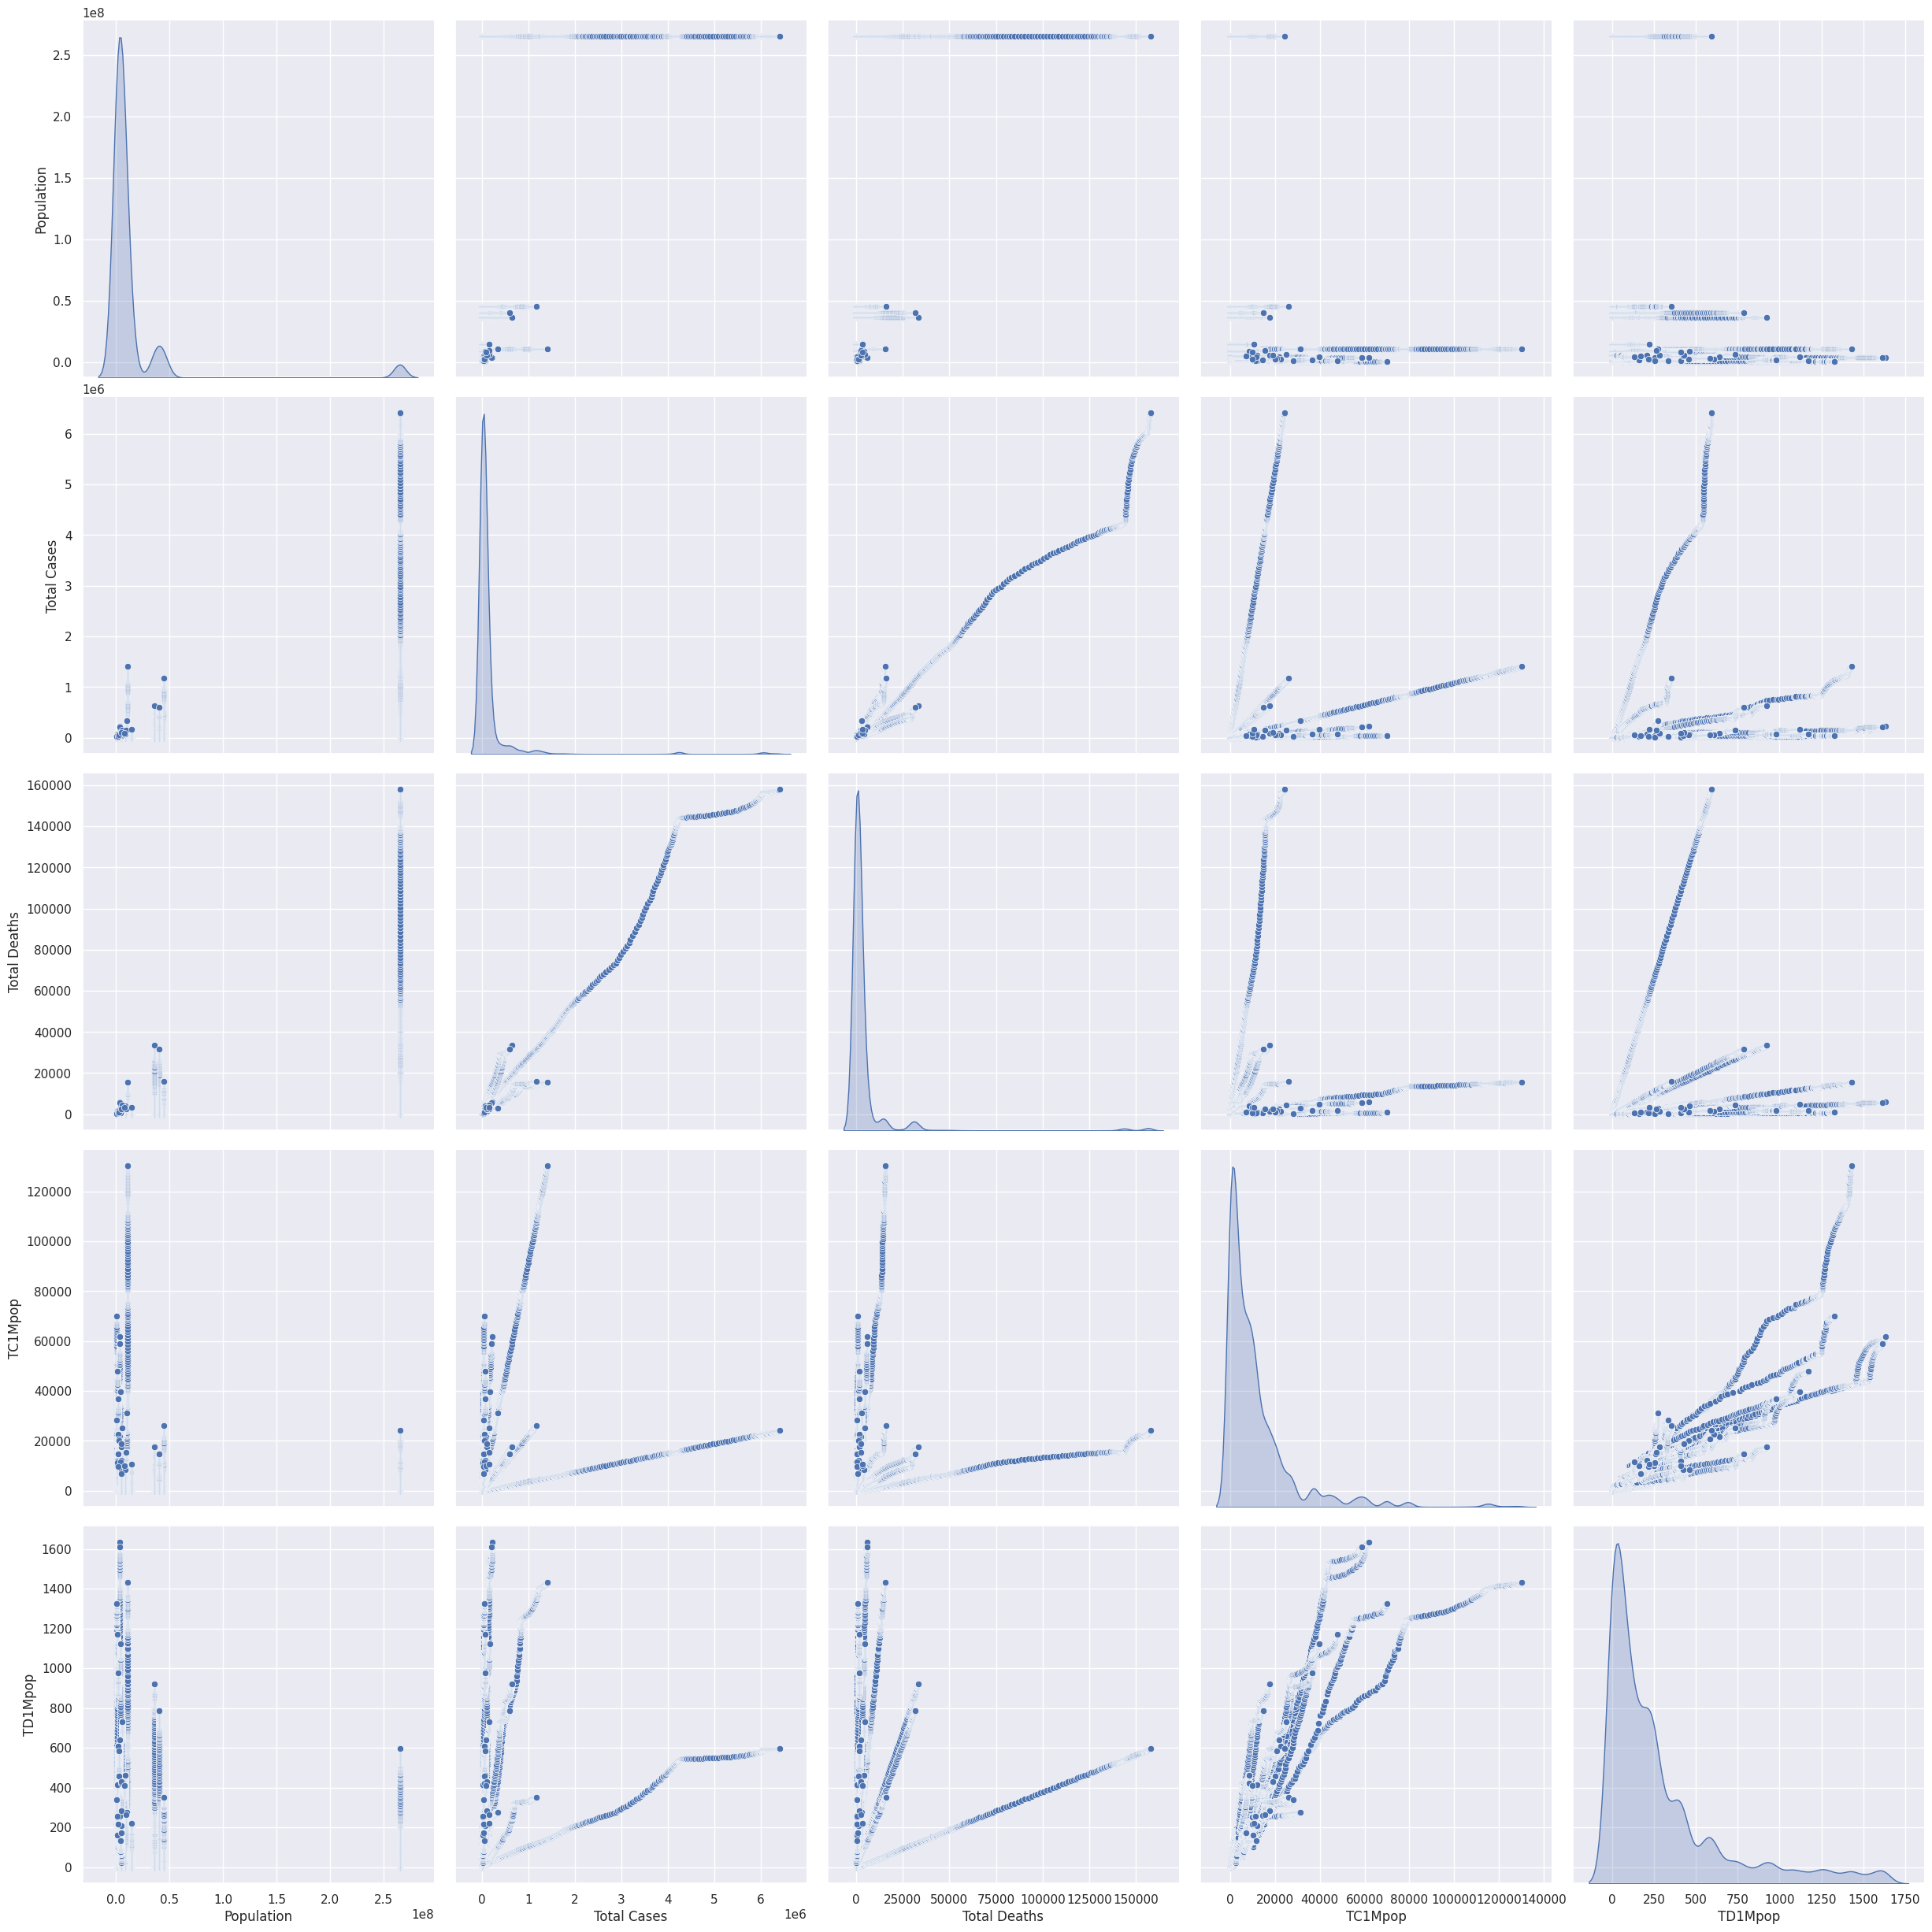

In [ ]:
sns.set()
sns.pairplot(df[columns],height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

**Outliers**

---



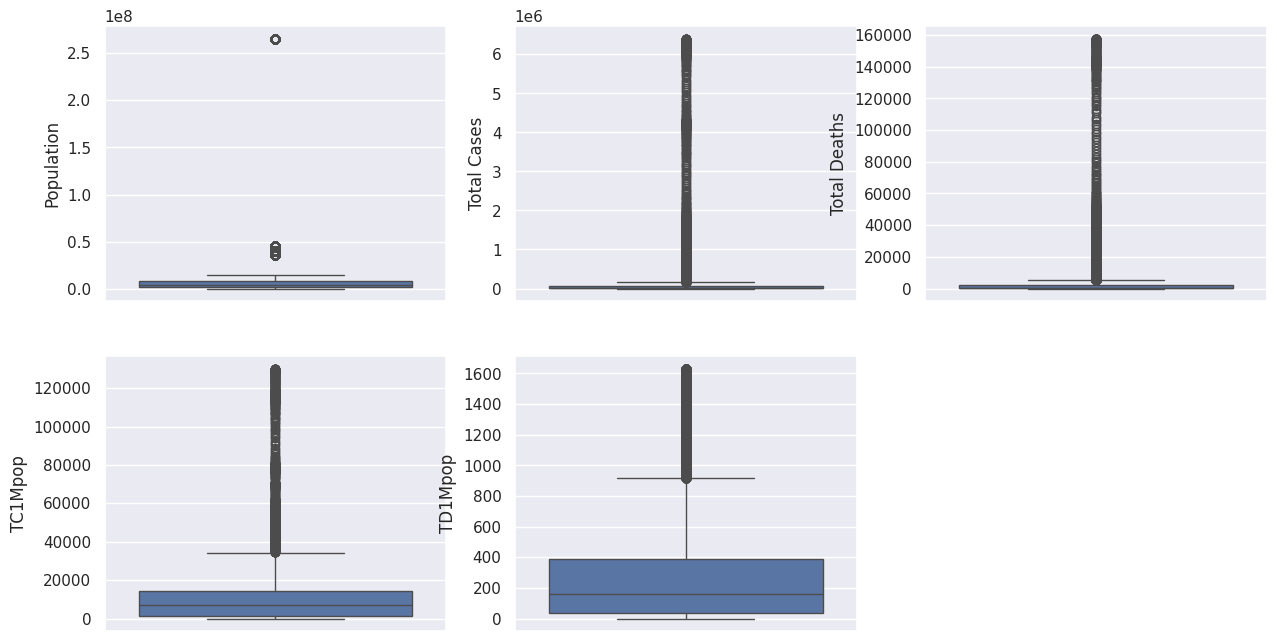

In [ ]:
i=1
import matplotlib.pyplot as plt
plt.figure(figsize=(15,25))
for feature in columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=df[feature])
    i+=1

In [ ]:
print(df.columns)

Index(['ISO ', 'Location', 'Population', 'Total Cases', 'Total Deaths',
       'Island', 'TC1Mpop', 'TD1Mpop'],
      dtype='object')


In [ ]:
#Mahalanobis distance

import pandas as pd
import numpy as np
from scipy.spatial import distance

# Define the features
features = ['Population', 'Total Cases', 'Total Deaths', 'TC1Mpop', 'TD1Mpop']
df[features] = df[features].apply(pd.to_numeric, errors='coerce')

# Calculate the mean of the features
mean = np.mean(df[features], axis=0)

# Calculate the covariance matrix of the features
covariance = np.cov(df[features].values.T)

# Calculate the Mahalanobis distance for each data point
distances = distance.cdist(df[features], [mean], 'mahalanobis', VI=np.linalg.inv(covariance))

# Set a threshold for identifying outliers
threshold = np.mean(distances) + 3 * np.std(distances)

# Find the indices of the outliers
outlier_indices = np.where(distances > threshold)[0]

# Print the outliers
print(df.iloc[outlier_indices])


         ISO     Location   Population  Total Cases  Total Deaths Island  \
3        IDN    Indonesia  265185520.0            2             0    NaN   
6        IDN    Indonesia  265185520.0            2             0    NaN   
10       IDN    Indonesia  265185520.0            2             0    NaN   
14       IDN    Indonesia  265185520.0            2             0    NaN   
19       IDN    Indonesia  265185520.0            4             0    NaN   
...      ...          ...          ...          ...           ...    ...   
31758  ID-JK  DKI Jakarta   10846145.0      1411395         15513   Jawa   
31761    IDN    Indonesia  265185520.0      6400035        157828    NaN   
31793  ID-JK  DKI Jakarta   10846145.0      1412511         15513   Jawa   
31795    IDN    Indonesia  265185520.0      6402686        157849    NaN   
31822    IDN    Indonesia  265185520.0      6405044        157876    NaN   

         TC1Mpop  TD1Mpop  
3           0.01     0.00  
6           0.01     0.00  
10 

In [ ]:
#DB scan
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Define the features
features = ['Population', 'Total Cases', 'Total Deaths', 'TC1Mpop', 'TD1Mpop']
df[features] = df[features].apply(pd.to_numeric, errors='coerce')

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Create the DBSCAN model
model = DBSCAN(eps=3.5, min_samples=10)

# Fit the model to the scaled data
model.fit(df_scaled)

# Get the cluster labels
labels = model.labels_

# Get the number of clusters (excluding noise points)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Get the number of noise points
n_noise = list(labels).count(-1)

# Print the results
print("Estimated number of clusters: %d" % n_clusters)
print("Estimated number of noise points: %d" % n_noise)

# Get the indices of the outliers (labelled as -1)
outlier_indices = np.where(labels == -1)[0]

# Print the outliers
print(df.iloc[outlier_indices])

Estimated number of clusters: 2
Estimated number of noise points: 0
Empty DataFrame
Columns: [ISO , Location, Population, Total Cases, Total Deaths, Island, TC1Mpop, TD1Mpop]
Index: []


In [ ]:
#K-means scan
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Define the features
features = ['Population', 'Total Cases', 'Total Deaths', 'TC1Mpop', 'TD1Mpop']

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Create the K-means model
model = KMeans(n_clusters=3)

# Fit the model to the scaled data
model.fit(df_scaled)

# Get the cluster labels
labels = model.labels_

# Get the cluster centers
centers = model.cluster_centers_

# Print the cluster labels and centers
print("Cluster Labels:")
print(labels)
print("Cluster Centers:")
print(centers)

# Calculate the Euclidean distance from each point to its cluster center
distances = np.zeros_like(labels, dtype=float)
for i, label in enumerate(labels):
    center = model.cluster_centers_[label]
    point = df_scaled[i]
    distances[i] = np.linalg.norm(point - center)

# Set a threshold for identifying outliers
threshold = np.mean(distances) + 3 * np.std(distances)

# Find the indices of the outliers
outlier_indices = np.where(distances > threshold)[0]

# Print the outliers
print(df.iloc[outlier_indices])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Labels:
[0 0 0 ... 0 0 1]
Cluster Centers:
[[-0.07062764 -0.14677936 -0.13886462 -0.27335636 -0.29102391]
 [ 5.59914318  7.3986182   7.45819947  0.40015843  0.61965261]
 [-0.20939436  0.19826871  0.11903596  2.36909922  2.49327478]]
        ISO      Location  Population  Total Cases  Total Deaths Island  \
2        IDN    Indonesia   265185520            2             0    NaN   
5        IDN    Indonesia   265185520            2             0    NaN   
9        IDN    Indonesia   265185520            2             0    NaN   
13       IDN    Indonesia   265185520            2             0    NaN   
18       IDN    Indonesia   265185520            4             0    NaN   
...      ...          ...         ...          ...           ...    ...   
31652  ID-JK  DKI Jakarta    10846145      1410134         15509   Jawa   
31687  ID-JK  DKI Jakarta    10846145      1410151         15512   Jawa   
31722  ID-JK  DKI Jakarta    10846145      1410167         15512   Jawa   
31757  ID

In [ ]:
#Local Outlier Factor
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Define the features
features = ['Population', 'Total Cases', 'Total Deaths', 'TC1Mpop', 'TD1Mpop']

# Create the LOF model
model = LocalOutlierFactor(n_neighbors=15, contamination=0.1)

# Fit the model to the data
model.fit(df[features])

# Get the outlier scores
outlier_scores = model.negative_outlier_factor_

# Set a threshold for identifying outliers
threshold = -2.5

# Find the indices of the outliers
outlier_indices = np.where(outlier_scores < threshold)[0]

# Print the outliers
print(df.iloc[outlier_indices])


       Population  Total Cases  Total Deaths   TC1Mpop  TD1Mpop
44        2635461            1             0      0.38     0.00
52        2635461            1             0      0.38     0.00
60        2635461            1             0      0.38     0.00
68        2635461            1             0      0.38     0.00
77        2635461            1             0      0.38     0.00
...           ...          ...           ...       ...      ...
31654     1180651        13950           487  11815.52   412.48
31689     1180651        13950           487  11815.52   412.48
31724     1180651        13950           487  11815.52   412.48
31759     1180651        13951           487  11816.36   412.48
31791     1999539        29173           522  14589.86   261.06

[950 rows x 5 columns]


**Feature Selection**

---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31821 entries, 1 to 31821
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Population    31821 non-null  int64  
 1   Total Cases   31821 non-null  int64  
 2   Total Deaths  31821 non-null  int64  
 3   TC1Mpop       31821 non-null  float64
 4   TD1Mpop       31821 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 1.2 MB


In [ ]:
#correlation table
df['TD1Mpop'] = pd.to_numeric(df['TD1Mpop'], errors='coerce')
df = df[df['TD1Mpop'].notnull()]
df = df.select_dtypes(include=["number"])
correlation = df.corr()
print(correlation['TD1Mpop'].sort_values(ascending = False),'\n')

TD1Mpop         1.000000
TC1Mpop         0.883277
Total Cases     0.214909
Total Deaths    0.213476
Population      0.007014
Name: TD1Mpop, dtype: float64 



**Feature Selection**


In [ ]:
#Pearson Correlation-Feature Selection
import pandas as pd
import numpy as np

# Define the features and target variable
features = ['Total Cases', 'Population','TD1Mpop','TC1Mpop']
target = 'Total Deaths'

# Calculate the Pearson correlation coefficients
correlation_matrix = df[features + [target]].corr().abs()

# Select the highly correlated features
threshold = 0.5
relevant_features = correlation_matrix[correlation_matrix > threshold][target].dropna().index.tolist()

# Print the selected features
print("Selected Features:")
print(relevant_features)


Selected Features:
['Total Cases', 'Population', 'Total Deaths']


Index(['TD1Mpop', 'TC1Mpop', 'Total Cases', 'Total Deaths', 'Population'], dtype='object')


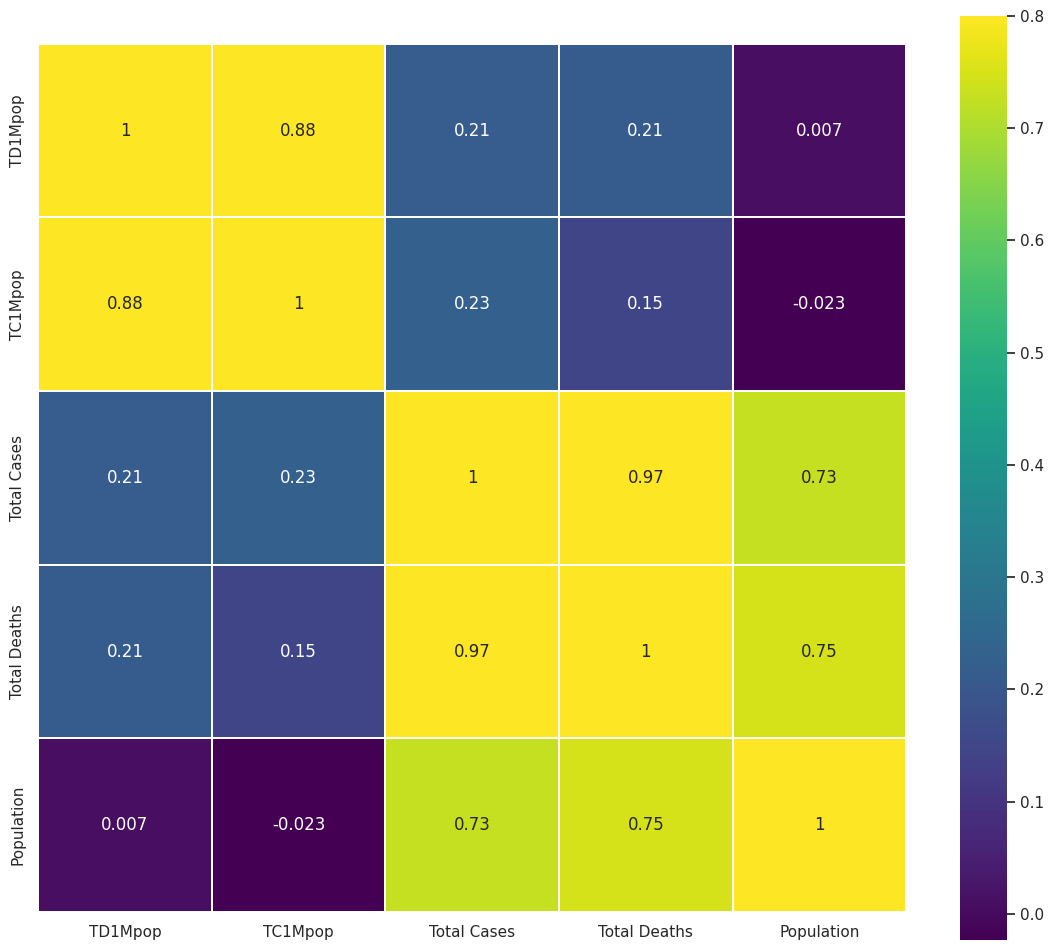

In [ ]:
#correlation chart
k= 10
cols = correlation.nlargest(k,'TD1Mpop')['TD1Mpop'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()





There is a high correlation between the number of cases and the number of deaths, which is generally logical.

We can convert the table to a form where cluster analysis can be carried out. To do this, you need to remove the continent variable and make the country variable an index.

In [ ]:
#t test
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import t

# Define the features and target variable
features = ['Total Cases', 'Population', 'TD1Mpop', 'TC1Mpop']
target = 'Total Deaths'

# Perform t-test for each feature
t_scores = []
p_values = []
for feature in features:
    feature_class_1 = df[df[target] == 0][feature]
    feature_class_2 = df[df[target] == 1][feature]
    t_score, p_value = ttest_ind(feature_class_1, feature_class_2)
    t_scores.append(t_score)
    p_values.append(p_value)

# Select the features with significant p-values
alpha = 0.05
n = df.shape[0]

# Calculate the critical t-value
critical_t = t.ppf(1 - alpha/2, n)

# Print the critical t-value
print("Critical t-value:", critical_t)

relevant_features = [feature for i, feature in enumerate(features) if p_values[i] < critical_t]

# Find the feature with the highest absolute t-score
max_t_score = max(t_scores, key=abs)
best_feature = features[t_scores.index(max_t_score)]

# Print the selected features, t-scores, and p-values
print("Selected Features:")
for i, feature in enumerate(relevant_features):
    print("Feature:", feature)
    print("T-score:", t_scores[i])
    print("P-value:", p_values[i])
    print()

# Print the best feature based on the highest absolute t-score
print("Best Feature based on t-score:", best_feature)


Critical t-value: 1.9600385378203424
Selected Features:
Feature: Total Cases
T-score: -9.969082267918012
P-value: 2.3538235411592574e-22

Feature: Population
T-score: 2.7465034950198604
P-value: 0.006134600180209361

Feature: TD1Mpop
T-score: -26.941582587869622
P-value: 6.893567014662836e-120

Feature: TC1Mpop
T-score: -7.9951313611844865
P-value: 3.653289180730231e-15

Best Feature based on t-score: TD1Mpop


In [ ]:
#chi square test
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Define the contingency table
contingency_table = pd.crosstab(df['Total Cases'], df['Total Deaths'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

# Find the feature with the lowest p-value
min_p_value = np.argmin(p_value)
best_feature = df.columns[min_p_value]

# Print the best feature based on the lowest p-value
print("Best Feature based on p-value:", best_feature)


Chi-square statistic: 195223684.5077954
P-value: 0.0
Degrees of freedom: 147293100
Expected frequencies: [[2.06250589e+00 3.05439804e+00 2.67128626e+00 ... 5.24810660e-03
  5.24810660e-03 5.24810660e-03]
 [1.43263882e+00 2.12161780e+00 1.85550423e+00 ... 3.64539141e-03
  3.64539141e-03 3.64539141e-03]
 [6.29867069e-01 9.32780239e-01 8.15782031e-01 ... 1.60271519e-03
  1.60271519e-03 1.60271519e-03]
 ...
 [1.23503347e-02 1.82898086e-02 1.59957261e-02 ... 3.14257880e-05
  3.14257880e-05 3.14257880e-05]
 [1.23503347e-02 1.82898086e-02 1.59957261e-02 ... 3.14257880e-05
  3.14257880e-05 3.14257880e-05]
 [1.23503347e-02 1.82898086e-02 1.59957261e-02 ... 3.14257880e-05
  3.14257880e-05 3.14257880e-05]]
Best Feature based on p-value: Population


In [ ]:
#Mutual Information Gain

import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from minepy import MINE

# Define the features and target variable
features = ['Total Cases', 'Population', 'TD1Mpop', 'TC1Mpop']
target = 'Total Deaths'

# Calculate Mutual Information Gain
mi_scores = mutual_info_classif(df[features], df[target])

# Calculate Maximal Information Coefficient (MIC)
mic_scores = []
for feature in features:
    mine = MINE()
    mine.compute_score(df[feature], df[target])
    mic_scores.append(mine.mic())

# Print the scores
print("Mutual Information Gain Scores:")
for i, feature in enumerate(features):
    print("Feature:", feature)
    print("Score:", mi_scores[i])
    print()

print("Maximal Information Coefficient (MIC) Scores:")
for i, feature in enumerate(features):
    print("Feature:", feature)
    print("Score:", mic_scores[i])
    print()



Mutual Information Gain Scores:
Feature: Total Cases
Score: 3.4078762521078216

Feature: Population
Score: 1.6101654768211002

Feature: TD1Mpop
Score: 3.9112474973245464

Feature: TC1Mpop
Score: 3.0345474518516147

Maximal Information Coefficient (MIC) Scores:
Feature: Total Cases
Score: 0.8771323829397184

Feature: Population
Score: 0.4104435883628617

Feature: TD1Mpop
Score: 0.6449123336912391

Feature: TC1Mpop
Score: 0.5975694593493176



In [ ]:
#FCBF
import pandas as pd
import numpy as np


# Define the features and target variable
X = df.drop(columns=['Total Deaths']).values
y = df['Total Deaths'].values

# Calculate the correlation matrix
corr_matrix = np.corrcoef(X.T)

# Initialize the selected features list
selected_features = []

# Iterate over each feature
for i in range(X.shape[1]):
    # Calculate the correlation between the current feature and the target variable
    corr_with_target = np.abs(np.corrcoef(X[:, i], y)[0, 1])
    print("Correlation with Target:")
    print(corr_with_target)

    # Calculate the average correlation with the already selected features
    avg_corr_with_selected = np.mean(np.abs(np.corrcoef(X[:, i], X[:, selected_features].T)))
    print("Average correlation with selected:")
    print(avg_corr_with_selected)

    # Check if the current feature satisfies the FCBF criterion
    if corr_with_target < avg_corr_with_selected:
        selected_features.append(i)

# Get the names of the selected features
feature_names = df.columns[selected_features]

# Print the selected features
print("Selected Features:")
for feature in feature_names:
    print(feature)


Correlation with Target:
0.7455834014486057
Average correlation with selected:
1.0
Correlation with Target:
0.9713991856299318
Average correlation with selected:
0.8636404889020303
Correlation with Target:
0.14640189239788806
Average correlation with selected:
0.5115961854628263
Correlation with Target:
0.21347614354294597
Average correlation with selected:
0.5363295662758343
Selected Features:
Population
Total Deaths
TC1Mpop


In [ ]:
#FAST
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, cut_tree
from sklearn.metrics import silhouette_samples
#df= df.drop(['ISO', 'Location', 'Island'], axis=1)
df.dtypes
df = df.astype(np.float64)

# Function to compute dissimilarity matrix
def compute_dissimilarity(df):
    dist_mat = pdist(df)
    return dist_mat

# Function to perform hierarchical clustering
def perform_clustering(dist_mat):
    hc = linkage(dist_mat, method='complete')
    return hc

# Function to cut dendrogram into k clusters
def cut_dendrogram(hc, k):
    clusters = cut_tree(hc, n_clusters=k).flatten()
    return clusters

# Function to compute silhouette scores
def compute_silhouette_scores(df, clusters):
    sil_scores = []
    for i in range(df.shape[1]):
        samples = df.iloc[:, i].values.reshape(-1, 1)  # Reshape the samples into a 2D array
        sil_score = silhouette_samples(samples, clusters)
        sil_scores.append(sil_score)
    return sil_scores

# Function to perform FAST feature selection
def fast(df, k):
    # Compute dissimilarity matrix
    dist_mat = compute_dissimilarity(df)

    # Perform hierarchical clustering
    hc = perform_clustering(dist_mat)

    # Cut dendrogram into k clusters
    clusters = cut_dendrogram(hc, k)

    # Compute silhouette scores
    sil_scores = compute_silhouette_scores(df, clusters)

    # Select features with highest silhouette scores
    mean_sil_scores = [np.mean(sil_score) for sil_score in sil_scores]
    selected_features = sorted(range(len(mean_sil_scores)), key=lambda i: mean_sil_scores[i], reverse=True)[:k]

    return selected_features


# Perform FAST feature selection
k = 3
selected = fast(df, k)
print(selected)

selected_feature_names = df.columns[selected]
print(selected_feature_names)



[0, 2, 1]
Index(['Population', 'Total Deaths', 'Total Cases'], dtype='object')


In [ ]:
#Relief
import random
import numpy as np
import pandas as pd

def relief_algorithm(X, y, k):
    n_instances, n_features = X.shape

    # Initialize feature scores for all features
    feature_scores = np.zeros(n_features)

    for i in range(n_instances):
        current_instance = X[i]

        # Find nearest hit instance from the same class
        hits = np.where(y == y[i])[0]
        nearest_hit = random.choice(hits)

        # Find nearest miss instance from a different class
        misses = np.where(y != y[i])[0]
        nearest_miss = random.choice(misses)

        # Update feature scores
        for j in range(n_features):
            feature_scores[j] += abs(current_instance[j] - X[nearest_hit][j])
            feature_scores[j] -= abs(current_instance[j] - X[nearest_miss][j])

    # Rank the features based on their scores
    ranked_features = np.argsort(-feature_scores)

    # Select the top scoring features
    selected_features = ranked_features[:k]

    return selected_features


# Define the target column
target_column = "Total Deaths"

# Separate the features and the target variable
X = df.drop(target_column, axis=1).values
y = df[target_column].values

# Set the number of top features to select
k = 3

# Apply the Relief algorithm
selected_features = relief_algorithm(X, y, k)

# Print the selected feature indices
print(selected_features)

# Get the names of the selected features
feature_names = df.columns[selected_features]

# Print the selected feature names
print(feature_names)



[3 2 1]
Index(['TC1Mpop', 'Total Deaths', 'Total Cases'], dtype='object')
